In [1]:
import os
os.getcwd()

'/Users/sophengsok/Documents/DataScience'

In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('./smsspamcollection/SMSSpamCollection',sep='\t',header=None,names=['label','message'])

In [3]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df=pd.read_table('./smsspamcollection/SMSSpamCollection',sep='\t',header=None,names=['label','message'])

In [5]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df['label']=df.label.map({'ham':0, 'spam':1})

In [7]:
df['label']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64

In [8]:
df['message']=df.message.map(lambda x:x.lower())

In [9]:
df['message']

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will ü b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: message, Length: 5572, dtype: object

In [10]:
import re

In [11]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
df.message.map(lambda x:re.sub("[!#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]","", x))

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                  will ü b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: message, Length: 5572, dtype: object

In [13]:
import nltk

In [14]:
df['message']=df.message.apply(nltk.word_tokenize)

In [15]:
df['message']

0       [go, until, jurong, point, ,, crazy, .., avail...
1                [ok, lar, ..., joking, wif, u, oni, ...]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor, ..., u, c, alrea...
4       [nah, i, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568      [will, ü, b, going, to, esplanade, fr, home, ?]
5569    [pity, ,, *, was, in, mood, for, that, ., so, ...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                  [rofl, ., its, true, to, its, name]
Name: message, Length: 5572, dtype: object

In [16]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
df['message']=df.message.apply(lambda x:[stemmer.stem(i) for i in x])

In [17]:
df['message']

0       [go, until, jurong, point, ,, crazi, .., avail...
1                  [ok, lar, ..., joke, wif, u, oni, ...]
2       [free, entri, in, 2, a, wkli, comp, to, win, f...
3       [u, dun, say, so, earli, hor, ..., u, c, alrea...
4       [nah, i, do, n't, think, he, goe, to, usf, ,, ...
                              ...                        
5567    [thi, is, the, 2nd, time, we, have, tri, 2, co...
5568          [will, ü, b, go, to, esplanad, fr, home, ?]
5569    [piti, ,, *, wa, in, mood, for, that, ., so, ....
5570    [the, guy, did, some, bitch, but, i, act, like...
5571                    [rofl, ., it, true, to, it, name]
Name: message, Length: 5572, dtype: object

In [18]:
df['message']=df.message.apply(lambda x:' '.join(x))
df['message']

0       go until jurong point , crazi .. avail onli in...
1                           ok lar ... joke wif u oni ...
2       free entri in 2 a wkli comp to win fa cup fina...
3       u dun say so earli hor ... u c alreadi then sa...
4       nah i do n't think he goe to usf , he live aro...
                              ...                        
5567    thi is the 2nd time we have tri 2 contact u. u...
5568                    will ü b go to esplanad fr home ?
5569    piti , * wa in mood for that . so ... ani othe...
5570    the guy did some bitch but i act like i 'd be ...
5571                            rofl . it true to it name
Name: message, Length: 5572, dtype: object

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()
count=count_vect.fit_transform(df['message'])

In [20]:
count

<5572x7454 sparse matrix of type '<class 'numpy.int64'>'
	with 73892 stored elements in Compressed Sparse Row format>

In [21]:
count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
count_vect.get_feature_names()

['00',
 '000',
 '000pe',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '0845

In [23]:
import sys
import numpy

In [24]:
numpy.set_printoptions(threshold=sys.maxsize)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(count, df['label'],random_state=100,test_size=0.1)

In [28]:
from sklearn.linear_model import LogisticRegression
classify=LogisticRegression(random_state=100,max_iter=5000,penalty='l1',solver='saga')
classify

LogisticRegression(max_iter=5000, penalty='l1', random_state=100, solver='saga')

In [29]:
classify.fit(X_train,y_train)

LogisticRegression(max_iter=5000, penalty='l1', random_state=100, solver='saga')

In [30]:
print(classify.intercept_)

[-3.96069073]


In [31]:
print(classify.coef_)

[[ 2.87254071e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  6.53255831e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000

In [32]:
classify.score(X_train,y_train)

0.992820103709613

In [33]:
classify.score(X_test,y_test)

0.985663082437276

In [35]:
predict=classify.predict(X_test)
predict

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [37]:
dataset=classify.predict_proba(X_test)
dataset

array([[8.10696639e-01, 1.89303361e-01],
       [9.99964922e-01, 3.50783001e-05],
       [6.03563601e-02, 9.39643640e-01],
       [9.85620955e-01, 1.43790451e-02],
       [9.99591375e-01, 4.08625187e-04],
       [9.91825136e-01, 8.17486418e-03],
       [9.85589092e-01, 1.44109083e-02],
       [9.98120922e-01, 1.87907847e-03],
       [9.81439382e-01, 1.85606175e-02],
       [9.97101563e-01, 2.89843652e-03],
       [3.11661701e-06, 9.99996883e-01],
       [9.88069614e-01, 1.19303865e-02],
       [9.98449580e-01, 1.55042046e-03],
       [4.51769188e-02, 9.54823081e-01],
       [9.80891418e-01, 1.91085823e-02],
       [9.97403667e-01, 2.59633303e-03],
       [9.80524258e-01, 1.94757424e-02],
       [9.81306165e-01, 1.86938347e-02],
       [9.98049011e-01, 1.95098915e-03],
       [9.87327613e-01, 1.26723870e-02],
       [9.88923318e-01, 1.10766821e-02],
       [4.54889367e-06, 9.99995451e-01],
       [9.99720408e-01, 2.79592433e-04],
       [9.97281393e-01, 2.71860673e-03],
       [9.925951

In [39]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predict))

[[475   1]
 [  7  75]]


<AxesSubplot:>

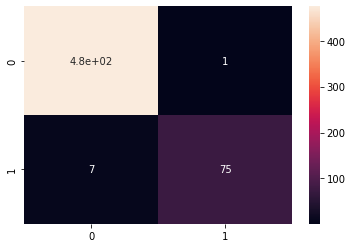

In [40]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y_test, predict),annot=True)